In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import datetime

In [4]:
ufo_df = pd.read_csv('../data/usa_ufos_clean2.csv', nrows = 132308,  encoding='unicode_escape')

In [5]:
ufo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132307 entries, 0 to 132306
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   occurred  132069 non-null  object
 1   city      132304 non-null  object
 2   state     132307 non-null  object
 3   country   132307 non-null  object
 4   shape     126496 non-null  object
 5   summary   132238 non-null  object
 6   reported  132307 non-null  object
 7   posted    132307 non-null  object
 8   image     3669 non-null    object
dtypes: object(9)
memory usage: 9.1+ MB


In [6]:
ufo_df.dropna(subset=['occurred'], inplace=True)
ufo_df

,occurred,city,state,country,shape,summary,reported,posted,image
0,2/15/2024 14:20,SHEPHERDSVILLE,KY,USA,ORB,Several sightings over several years.,2/15/2024,2/15/2024,NaN
1,2/15/2024 6:21,GREENVILLE,SC,USA,CIRCLE,"Object moving slowing across the sky, suddenly...",2/15/2024,2/15/2024,NaN
2,2/14/2024 22:45,UNKNOWN,VA,USA,LIGHT,Standing to the west of this object it hung in...,2/15/2024,2/15/2024,NaN
3,2/14/2024 22:44,SOMERS,CT,USA,UNKNOWN,"Odd, flashing object I could only describe dur...",2/14/2024,2/15/2024,Y
4,2/14/2024 22:15,BOSCAWEN,NH,USA,LIGHT,Bright light in sky changing shape but almost ...,2/15/2024,2/15/2024,Y
...,...,...,...,...,...,...,...,...,...
132064,04/05/1800 20:00,BATON ROUGE,LA,USA,LIGHT,UFO report communicated by Thomas Jefferson,2/5/2011,2/8/2011,NaN
132065,06/30/1790 21:00,CARLISLE,NY,USA,FIREBALL,"Slow Moving Fireball, stench of burning sulpher.",6/25/2007,8/7/2007,NaN
132066,02/01/1721 05:24,CRESCENT CITY,CA,USA,UNKNOWN,"Straight line of lights in sky moving east,",2/25/2021,3/2/2021,NaN
132067,09/01/1639 20:00,MUDDY RIVER,MA,USA,CHANGING,Lost time at sight of swift moving flaming obj...,6/18/2020,6/25/2020,NaN


In [7]:
ufo_df['occurred'] = pd.to_datetime(ufo_df['occurred'], errors = 'coerce')

In [8]:
ufo_df['occurred'].value_counts()

2015-11-07 18:00:00    104
2014-07-04 22:00:00     46
2010-07-04 22:00:00     37
2012-07-04 22:00:00     34
1999-11-16 19:00:00     27
                      ... 
2015-02-10 16:30:00      1
2015-02-10 17:00:00      1
2015-02-10 19:00:00      1
2015-02-10 19:10:00      1
1721-02-01 05:24:00      1
Name: occurred, Length: 113562, dtype: int64

In [9]:
ufo_df['occurred_date'] = ufo_df['occurred'].dt.date
ufo_df

,occurred,city,state,country,shape,summary,reported,posted,image,occurred_date
0,2024-02-15 14:20:00,SHEPHERDSVILLE,KY,USA,ORB,Several sightings over several years.,2/15/2024,2/15/2024,NaN,2024-02-15
1,2024-02-15 06:21:00,GREENVILLE,SC,USA,CIRCLE,"Object moving slowing across the sky, suddenly...",2/15/2024,2/15/2024,NaN,2024-02-15
2,2024-02-14 22:45:00,UNKNOWN,VA,USA,LIGHT,Standing to the west of this object it hung in...,2/15/2024,2/15/2024,NaN,2024-02-14
3,2024-02-14 22:44:00,SOMERS,CT,USA,UNKNOWN,"Odd, flashing object I could only describe dur...",2/14/2024,2/15/2024,Y,2024-02-14
4,2024-02-14 22:15:00,BOSCAWEN,NH,USA,LIGHT,Bright light in sky changing shape but almost ...,2/15/2024,2/15/2024,Y,2024-02-14
...,...,...,...,...,...,...,...,...,...,...
132064,1800-04-05 20:00:00,BATON ROUGE,LA,USA,LIGHT,UFO report communicated by Thomas Jefferson,2/5/2011,2/8/2011,NaN,1800-04-05
132065,1790-06-30 21:00:00,CARLISLE,NY,USA,FIREBALL,"Slow Moving Fireball, stench of burning sulpher.",6/25/2007,8/7/2007,NaN,1790-06-30
132066,1721-02-01 05:24:00,CRESCENT CITY,CA,USA,UNKNOWN,"Straight line of lights in sky moving east,",2/25/2021,3/2/2021,NaN,1721-02-01
132067,NaT,MUDDY RIVER,MA,USA,CHANGING,Lost time at sight of swift moving flaming obj...,6/18/2020,6/25/2020,NaN,NaT


In [10]:
ufo_df['occurred_time'] = ufo_df['occurred'].dt.time
ufo_df

,occurred,city,state,country,shape,summary,reported,posted,image,occurred_date,occurred_time
0,2024-02-15 14:20:00,SHEPHERDSVILLE,KY,USA,ORB,Several sightings over several years.,2/15/2024,2/15/2024,NaN,2024-02-15,14:20:00
1,2024-02-15 06:21:00,GREENVILLE,SC,USA,CIRCLE,"Object moving slowing across the sky, suddenly...",2/15/2024,2/15/2024,NaN,2024-02-15,06:21:00
2,2024-02-14 22:45:00,UNKNOWN,VA,USA,LIGHT,Standing to the west of this object it hung in...,2/15/2024,2/15/2024,NaN,2024-02-14,22:45:00
3,2024-02-14 22:44:00,SOMERS,CT,USA,UNKNOWN,"Odd, flashing object I could only describe dur...",2/14/2024,2/15/2024,Y,2024-02-14,22:44:00
4,2024-02-14 22:15:00,BOSCAWEN,NH,USA,LIGHT,Bright light in sky changing shape but almost ...,2/15/2024,2/15/2024,Y,2024-02-14,22:15:00
...,...,...,...,...,...,...,...,...,...,...,...
132064,1800-04-05 20:00:00,BATON ROUGE,LA,USA,LIGHT,UFO report communicated by Thomas Jefferson,2/5/2011,2/8/2011,NaN,1800-04-05,20:00:00
132065,1790-06-30 21:00:00,CARLISLE,NY,USA,FIREBALL,"Slow Moving Fireball, stench of burning sulpher.",6/25/2007,8/7/2007,NaN,1790-06-30,21:00:00
132066,1721-02-01 05:24:00,CRESCENT CITY,CA,USA,UNKNOWN,"Straight line of lights in sky moving east,",2/25/2021,3/2/2021,NaN,1721-02-01,05:24:00
132067,NaT,MUDDY RIVER,MA,USA,CHANGING,Lost time at sight of swift moving flaming obj...,6/18/2020,6/25/2020,NaN,NaT,NaT


In [11]:
ufo_df['occurred_year'] = ufo_df['occurred'].dt.year
ufo_df

,occurred,city,state,country,shape,summary,reported,posted,image,occurred_date,occurred_time,occurred_year
0,2024-02-15 14:20:00,SHEPHERDSVILLE,KY,USA,ORB,Several sightings over several years.,2/15/2024,2/15/2024,NaN,2024-02-15,14:20:00,2024.0
1,2024-02-15 06:21:00,GREENVILLE,SC,USA,CIRCLE,"Object moving slowing across the sky, suddenly...",2/15/2024,2/15/2024,NaN,2024-02-15,06:21:00,2024.0
2,2024-02-14 22:45:00,UNKNOWN,VA,USA,LIGHT,Standing to the west of this object it hung in...,2/15/2024,2/15/2024,NaN,2024-02-14,22:45:00,2024.0
3,2024-02-14 22:44:00,SOMERS,CT,USA,UNKNOWN,"Odd, flashing object I could only describe dur...",2/14/2024,2/15/2024,Y,2024-02-14,22:44:00,2024.0
4,2024-02-14 22:15:00,BOSCAWEN,NH,USA,LIGHT,Bright light in sky changing shape but almost ...,2/15/2024,2/15/2024,Y,2024-02-14,22:15:00,2024.0
...,...,...,...,...,...,...,...,...,...,...,...,...
132064,1800-04-05 20:00:00,BATON ROUGE,LA,USA,LIGHT,UFO report communicated by Thomas Jefferson,2/5/2011,2/8/2011,NaN,1800-04-05,20:00:00,1800.0
132065,1790-06-30 21:00:00,CARLISLE,NY,USA,FIREBALL,"Slow Moving Fireball, stench of burning sulpher.",6/25/2007,8/7/2007,NaN,1790-06-30,21:00:00,1790.0
132066,1721-02-01 05:24:00,CRESCENT CITY,CA,USA,UNKNOWN,"Straight line of lights in sky moving east,",2/25/2021,3/2/2021,NaN,1721-02-01,05:24:00,1721.0
132067,NaT,MUDDY RIVER,MA,USA,CHANGING,Lost time at sight of swift moving flaming obj...,6/18/2020,6/25/2020,NaN,NaT,NaT,NaN


In [12]:
ufo_df['occurred_month'] = ufo_df['occurred'].dt.month
ufo_df.head()

,occurred,city,state,country,shape,summary,reported,posted,image,occurred_date,occurred_time,occurred_year,occurred_month
0,2024-02-15 14:20:00,SHEPHERDSVILLE,KY,USA,ORB,Several sightings over several years.,2/15/2024,2/15/2024,NaN,2024-02-15,14:20:00,2024.0,2.0
1,2024-02-15 06:21:00,GREENVILLE,SC,USA,CIRCLE,"Object moving slowing across the sky, suddenly...",2/15/2024,2/15/2024,NaN,2024-02-15,06:21:00,2024.0,2.0
2,2024-02-14 22:45:00,UNKNOWN,VA,USA,LIGHT,Standing to the west of this object it hung in...,2/15/2024,2/15/2024,NaN,2024-02-14,22:45:00,2024.0,2.0
3,2024-02-14 22:44:00,SOMERS,CT,USA,UNKNOWN,"Odd, flashing object I could only describe dur...",2/14/2024,2/15/2024,Y,2024-02-14,22:44:00,2024.0,2.0
4,2024-02-14 22:15:00,BOSCAWEN,NH,USA,LIGHT,Bright light in sky changing shape but almost ...,2/15/2024,2/15/2024,Y,2024-02-14,22:15:00,2024.0,2.0


In [13]:
ufo_df.to_csv('ufo_times2.csv')

In [14]:
date_counts = ufo_df['occurred_date'].value_counts()
date_counts = pd.DataFrame(date_counts).reset_index()
date_counts.columns = ['date', 'count']

#us_city_count2.sort_values('count', ascending=False)
date_counts.nlargest(10, 'count')

,date,count
0,2015-11-07,288
1,2014-07-04,269
2,2010-07-04,207
3,2012-07-04,199
4,1999-11-16,187
5,2013-07-04,181
6,2015-07-04,176
7,2011-07-04,161
8,2009-09-19,124
9,2016-07-27,102


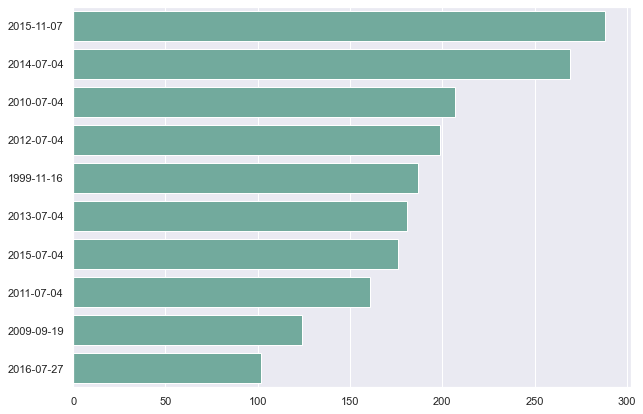

In [15]:
top10 = date_counts.nlargest(10, 'count')
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
ax = sns.barplot(
    x="count",
    y='date', 
    data=top10, 
#   estimator=sum, 
    ci=None, 
    color='#69b3a2');
#plt.title('MOST UFOS SEEN IN A DAY')
#plt.xlabel('Total Number of Sightings')
#plt.ylabel('Total Number of Sightings')
ax.set(xlabel=None)
ax.set(ylabel=None);

plt.savefig('MOST UFOS SEEN IN A DAY', dpi=300)

In [16]:
ufo_df[ufo_df['occurred_date'] == '2015-11-07']

### why isn't this working??

,occurred,city,state,country,shape,summary,reported,posted,image,occurred_date,occurred_time,occurred_year,occurred_month


https://www.cnn.com/2015/11/08/us/southern-california-navy-test-mystery-light/index.html

In [17]:
ufo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132069 entries, 0 to 132068
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   occurred        132067 non-null  datetime64[ns]
 1   city            132066 non-null  object        
 2   state           132069 non-null  object        
 3   country         132069 non-null  object        
 4   shape           126294 non-null  object        
 5   summary         132000 non-null  object        
 6   reported        132069 non-null  object        
 7   posted          132069 non-null  object        
 8   image           3669 non-null    object        
 9   occurred_date   132067 non-null  object        
 10  occurred_time   132067 non-null  object        
 11  occurred_year   132067 non-null  float64       
 12  occurred_month  132067 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 14.1+ MB


In [18]:
ufo_df['occurred_year'].max()

2029.0

In [19]:
year = ufo_df[ufo_df['occurred_year'] <= 2023]
year

,occurred,city,state,country,shape,summary,reported,posted,image,occurred_date,occurred_time,occurred_year,occurred_month
244,2023-12-31 23:45:00,ALLENTOWN,PA,USA,DISK,Orange light in the sky moving quickly from no...,1/2/2024,2/15/2024,Y,2023-12-31,23:45:00,2023.0,12.0
245,2023-12-31 23:00:00,WESLEY CHAPEL,FL,USA,LIGHT,Bright light,1/1/2024,2/15/2024,NaN,2023-12-31,23:00:00,2023.0,12.0
246,2023-12-31 21:15:00,MUSKEGO,WI,USA,ORB,"A formation of five focused areas of light, ob...",1/1/2024,2/15/2024,NaN,2023-12-31,21:15:00,2023.0,12.0
247,2023-12-31 20:32:00,BROADWAY,NC,USA,ORB,Three orange orbs two in front one trailing be...,1/4/2024,2/15/2024,Y,2023-12-31,20:32:00,2023.0,12.0
248,2023-12-31 20:00:00,HARTSELLE,AL,USA,UNKNOWN,"High Altitude Craft, Fires object, Capable of ...",1/25/2024,2/15/2024,NaN,2023-12-31,20:00:00,2023.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132062,1861-03-29 00:00:00,NEW YORK CITY,NY,USA,CROSS,"Strange, cross-shaped, object witnessed over N...",1/16/2013,2/4/2013,NaN,1861-03-29,00:00:00,1861.0,3.0
132063,1860-08-02 23:00:00,CHEROKEE,NC,USA,FIREBALL,meteor or fireball passage,7/18/1999,12/2/2000,NaN,1860-08-02,23:00:00,1860.0,8.0
132064,1800-04-05 20:00:00,BATON ROUGE,LA,USA,LIGHT,UFO report communicated by Thomas Jefferson,2/5/2011,2/8/2011,NaN,1800-04-05,20:00:00,1800.0,4.0
132065,1790-06-30 21:00:00,CARLISLE,NY,USA,FIREBALL,"Slow Moving Fireball, stench of burning sulpher.",6/25/2007,8/7/2007,NaN,1790-06-30,21:00:00,1790.0,6.0


In [20]:
year['occurred_year'].min()

1721.0

In [21]:
year_min = year[year['occurred_year'] >= 1930]

In [22]:
year_min['occurred_year'].min()

1930.0

In [23]:
year_min['occurred_year'].value_counts()

year_counts = year_min['occurred_year'].value_counts()
year_counts = pd.DataFrame(year_counts).reset_index()
year_counts.columns = ['year', 'count']

#us_city_count2.sort_values('count', ascending=False)
year_counts.nlargest(20, 'year')

,year,count
16,2023.0,3815
10,2022.0,4600
19,2021.0,3456
3,2020.0,6915
5,2019.0,6052
20,2018.0,3356
8,2017.0,4860
6,2016.0,5452
4,2015.0,6598
0,2014.0,8196


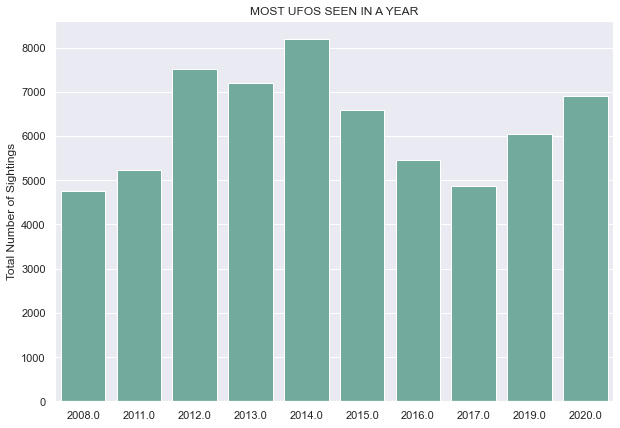

In [24]:
top10 = year_counts.nlargest(10, 'count')
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
ax = sns.barplot(
    x="year", 
    y='count', 
    data=top10, 
#   estimator=sum, 
    ci=None, 
    color='#69b3a2');
plt.title('MOST UFOS SEEN IN A YEAR')
#plt.xlabel('Total Number of Sightings')
plt.ylabel('Total Number of Sightings')
ax.set(xlabel=None);

plt.savefig('MOST UFOS SEEN IN A YEAR', dpi=300)

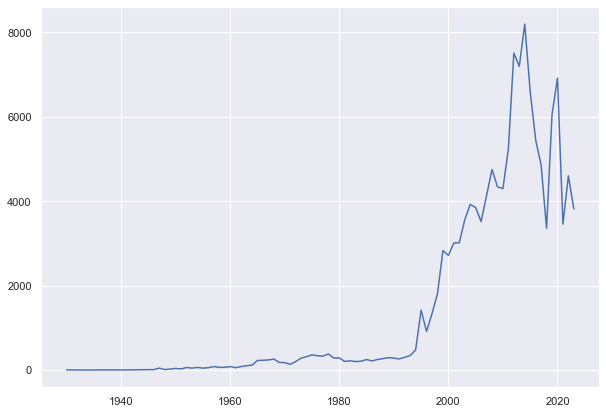

In [25]:
# set plot style: grey grid in the background:


sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

#set palette
#sns.set_palette("muted")

ax = sns.lineplot(data=year_counts, x='year', y='count')
;

#plt.title('Scooters in Use per Company per Day May 1 - July 31 2019')
ax.set(title=None)
ax.set(xlabel=None)
ax.set(ylabel=None);
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title=None)
#plt.legend(title=None)

#ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
#ax.set_xticklabels(('May 1', 'May 15', 'Jun 1', 'Jun 15', 'Jul 1', 'Jul 15', 'Aug 1'))

#plt.savefig('Scooters in Use per Company per Day')

National UFO Reporting Center was founded in 1974 by noted UFO investigator Robert J. Gribble

The principal means used by the Center to receive sighting reports is this website, which has operated continuously since 1994.   Prior to that period, the telephone hotline and the U.S. mail were the primary means of taking reports.   

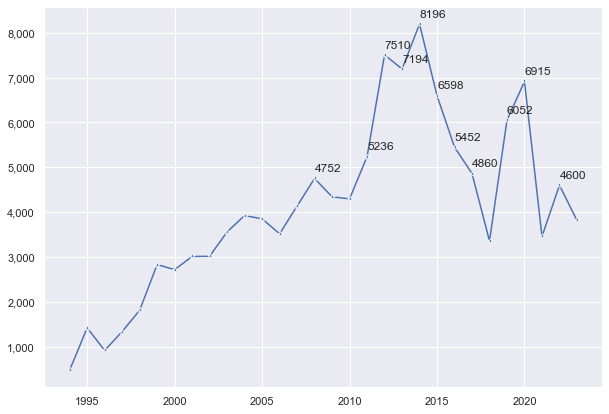

In [44]:
# set plot style: grey grid in the background:
nuforc_year = year_counts[year_counts['year'] >= 1994]

sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

#set palette
#sns.set_palette("muted")

ax = sns.lineplot(data=nuforc_year, x='year', y='count', marker='*')
;

#plt.title('Yearly UFO sightings 1994-2023')
#ax.set(title=None)
ax.set(xlabel=None)
ax.set(ylabel=None);
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title=None)
#plt.legend(title=None)
ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# label points on the plot
for x, y in zip(nuforc_year['year'], nuforc_year['count']):
 if y > 4500:
    plt.text(x = x, # x-coordinate position of data label
 # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
 #plt.text(x = x, # x-coordinate position of data label
 y = y+150, # y-coordinate position of data label, adjusted to be 150 below the data point
 s = '{:.0f}'.format(y)) # data label, formatted to ignore decimals
 #color = ‘purple’) # set colour of line

plt.savefig('Yearly UFO sightings 1994-2023', dpi=300)

In [27]:
nuforc_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    30 non-null     float64
 1   count   30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.8 KB


In [46]:
nuforc_year['daily_avg'] = round(nuforc_year['count'] / 365, 2)
nuforc_year.head()

C:\Users\tkwhi\AppData\Local\Temp/ipykernel_17004/2493688443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuforc_year['daily_avg'] = round(nuforc_year['count'] / 365, 2)


,year,count,daily_avg
0,2014.0,8196,22.45
1,2012.0,7510,20.58
2,2013.0,7194,19.71
3,2020.0,6915,18.95
4,2015.0,6598,18.08


In [48]:
nuforc_year['daily_avg'].mean()

11.245666666666667

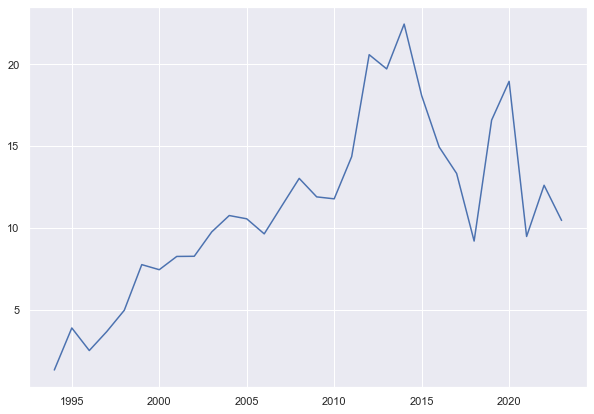

In [31]:
# set plot style: grey grid in the background:

sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

#set palette
#sns.set_palette("muted")

ax = sns.lineplot(data=nuforc_year, x='year', y='daily_avg')
;

#plt.title('Yearly UFO sightings 1994-2023')
#ax.set(title=None)
ax.set(xlabel=None)
ax.set(ylabel=None);
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title=None)
#plt.legend(title=None)

# label points on the plot

#for x, y in zip(nuforc_year['year'], nuforc_year['daily_avg']): ax1.annotate(y, xy=(x, y), textcoords='data') & ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9))

# for x, y in zip(nuforc_year['year'], nuforc_year['daily_avg']):
#     if y > 15:
#         plt.text(x = x, # x-coordinate position of data label
# # #  # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
#     #plt.text(x = x, # x-coordinate position of data label
#         y = y+150, # y-coordinate position of data label, adjusted to be 150 below the data point
#         s = '{:f}'.format(y)) # data label, formatted to ignore decimals
# # #  #color = ‘purple’) # set colour of line

plt.savefig('Avg Daily UFO sightings 1994-2023', dpi=300)

In [32]:
ufo_df['occurred_month'].value_counts()

mo_counts = ufo_df['occurred_month'].value_counts()
mo_counts = pd.DataFrame(mo_counts).reset_index()
mo_counts.columns = ['month', 'count']
mo_counts

,month,count
0,7.0,15335
1,8.0,13525
2,9.0,12693
3,10.0,12677
4,6.0,12639
5,11.0,11359
6,12.0,9508
7,5.0,9406
8,1.0,9202
9,4.0,9075


In [33]:
mo_counts

,month,count
0,7.0,15335
1,8.0,13525
2,9.0,12693
3,10.0,12677
4,6.0,12639
5,11.0,11359
6,12.0,9508
7,5.0,9406
8,1.0,9202
9,4.0,9075


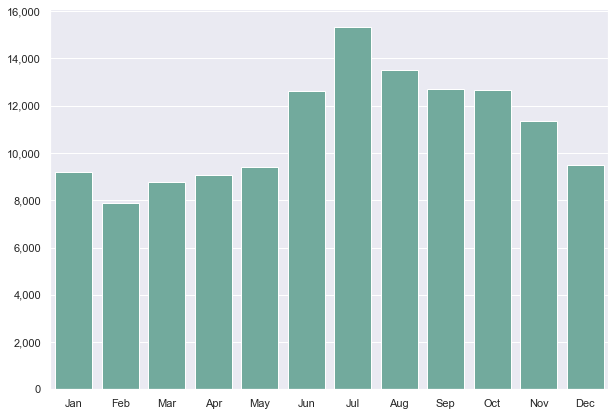

In [38]:

sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
ax = sns.barplot(
    x="month",
    y='count', 
    data=mo_counts, 
#   estimator=sum, 
    ci=None, 
    color='#69b3a2');
#plt.title('Monthly UFO Sightings')
#plt.xlabel('Total Number of Sightings')
#plt.ylabel('Total Number of Sightings')
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_xticklabels(('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'));
ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.savefig('Monthly UFO Sightings', dpi=300)

shapes over time?

In [35]:
shape_group = ufo_df.groupby(['shape', 'occurred_year'])['shape'].value_counts()
#df.groupby(['Courses','Duration'])['Fee'].count()
#shape_group = pd.DataFrame(shape_group).reset_index()
#shape_group.columns = ['shape', 'year', 'count']
shape_group

shape     occurred_year  shape   
CHANGING  1954.0         CHANGING      1
          1960.0         CHANGING      1
          1961.0         CHANGING      1
          1962.0         CHANGING      2
          1963.0         CHANGING      1
                                    ... 
UNKNOWN   2020.0         UNKNOWN     346
          2021.0         UNKNOWN     177
          2022.0         UNKNOWN     283
          2023.0         UNKNOWN     252
          2024.0         UNKNOWN      14
Name: shape, Length: 1578, dtype: int64

In [36]:
ufo_df['shape'].value_counts()

LIGHT        24646
CIRCLE       12736
TRIANGLE     11825
UNKNOWN       9004
FIREBALL      8975
OTHER         8854
DISK          7518
SPHERE        6744
OVAL          5641
ORB           5492
FORMATION     4373
CHANGING      3605
CIGAR         3319
RECTANGLE     2354
CYLINDER      2224
FLASH         2179
DIAMOND       1855
CHEVRON       1593
EGG           1106
TEARDROP      1096
CONE           505
CROSS          450
STAR           164
CUBE            36
Name: shape, dtype: int64

In [37]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

#set palette
#sns.set_palette("muted")

ax = sns.lineplot(data=shape_group, x='occurred_year', y='count', hue='shape'
                  )
;

#plt.title('Scooters in Use per Company per Day May 1 - July 31 2019')
ax.set(title=None)
ax.set(xlabel=None)
ax.set(ylabel=None)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title=None)

ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
#ax.set_xticklabels(('May 1', 'May 15', 'Jun 1', 'Jun 15', 'Jul 1', 'Jul 15', 'Aug 1'))

#plt.savefig('Scooters in Use per Company per Day')

ValueError: Could not interpret value `count` for parameter `y`

<Figure size 720x504 with 0 Axes>

In [ ]:
ufo_df.head()

,occurred,city,state,country,shape,summary,reported,posted,image,occurred_date,occurred_time,occurred_year,occurred_month
0,2024-02-15 14:20:00,SHEPHERDSVILLE,KY,USA,ORB,Several sightings over several years.,2/15/2024,2/15/2024,NaN,2024-02-15,14:20:00,2024.0,2.0
1,2024-02-15 06:21:00,GREENVILLE,SC,USA,CIRCLE,"Object moving slowing across the sky, suddenly...",2/15/2024,2/15/2024,NaN,2024-02-15,06:21:00,2024.0,2.0
2,2024-02-14 22:45:00,UNKNOWN,VA,USA,LIGHT,Standing to the west of this object it hung in...,2/15/2024,2/15/2024,NaN,2024-02-14,22:45:00,2024.0,2.0
3,2024-02-14 22:44:00,SOMERS,CT,USA,UNKNOWN,"Odd, flashing object I could only describe dur...",2/14/2024,2/15/2024,Y,2024-02-14,22:44:00,2024.0,2.0
4,2024-02-14 22:15:00,BOSCAWEN,NH,USA,LIGHT,Bright light in sky changing shape but almost ...,2/15/2024,2/15/2024,Y,2024-02-14,22:15:00,2024.0,2.0
